In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

xls = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/0Churn Prediction of Customers/E Commerce Dataset.xlsx')
print(xls.sheet_names)

['Data Dict', 'E Comm']


In [ ]:
df1 = pd.read_excel(xls, sheet_name = 'Data Dict')
df2 = pd.read_excel(xls, sheet_name = 'E Comm')

In [ ]:
print(df1)
print('\n' + '-'*80 + '\n')
print(df2)

    Unnamed: 0 Unnamed: 1                   Unnamed: 2  \
0          NaN       Data                     Variable   
1          NaN     E Comm                   CustomerID   
2          NaN     E Comm                        Churn   
3          NaN     E Comm                       Tenure   
4          NaN     E Comm         PreferredLoginDevice   
5          NaN     E Comm                     CityTier   
6          NaN     E Comm              WarehouseToHome   
7          NaN     E Comm         PreferredPaymentMode   
8          NaN     E Comm                       Gender   
9          NaN     E Comm               HourSpendOnApp   
10         NaN     E Comm     NumberOfDeviceRegistered   
11         NaN     E Comm             PreferedOrderCat   
12         NaN     E Comm            SatisfactionScore   
13         NaN     E Comm                MaritalStatus   
14         NaN     E Comm              NumberOfAddress   
15         NaN     E Comm                     Complain   
16         NaN

In [ ]:
df_dict = df1
df = df2

In [ ]:
df.shape

(5630, 20)

In [ ]:
df.columns = df.columns.str.lower()
df.head(5)

,customerid,churn,tenure,preferredlogindevice,citytier,warehousetohome,preferredpaymentmode,gender,hourspendonapp,numberofdeviceregistered,preferedordercat,satisfactionscore,maritalstatus,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df_copy = df.copy()


```
CustomerID,         客戶唯一識別碼
Churn,            客戶流失標記
Tenure,           客戶在組織中的服務時間 客戶關係存續期
PreferredLoginDevice,    客戶偏好的登入裝置
CityTier,          城市等級
WarehouseToHome,       倉庫到客戶住家的距離
PreferredPaymentMode,    客戶偏好的付款方式
Gender,            客戶性別
HourSpendOnApp,       客戶在行動應用程式上的使用時數
NumberOfDeviceRegistered,  客戶註冊的設備數量
PreferedOrderCat,      客戶上月偏好的訂單類別
SatisfactionScore,      客戶對服務的滿意度評分
MaritalStatus,        客戶婚姻狀況
NumberOfAddress,       客戶新增的地址數量
Complain,           客戶上月是否有提出任何投訴
OrderAmountHikeFromlastYear, 客戶訂單金額相較去年成長的百分比
CouponUsed,          客戶上月使用的優惠券數量
OrderCount,          客戶上月下單的總次數
DaySinceLastOrder,      客戶距離上次下單的天數
CashbackAmount,        客戶上月平均獲得的現金回饋金額
```


In [ ]:
df['churn'].value_counts()
#需平衡

,count
churn,
0,4682
1,948


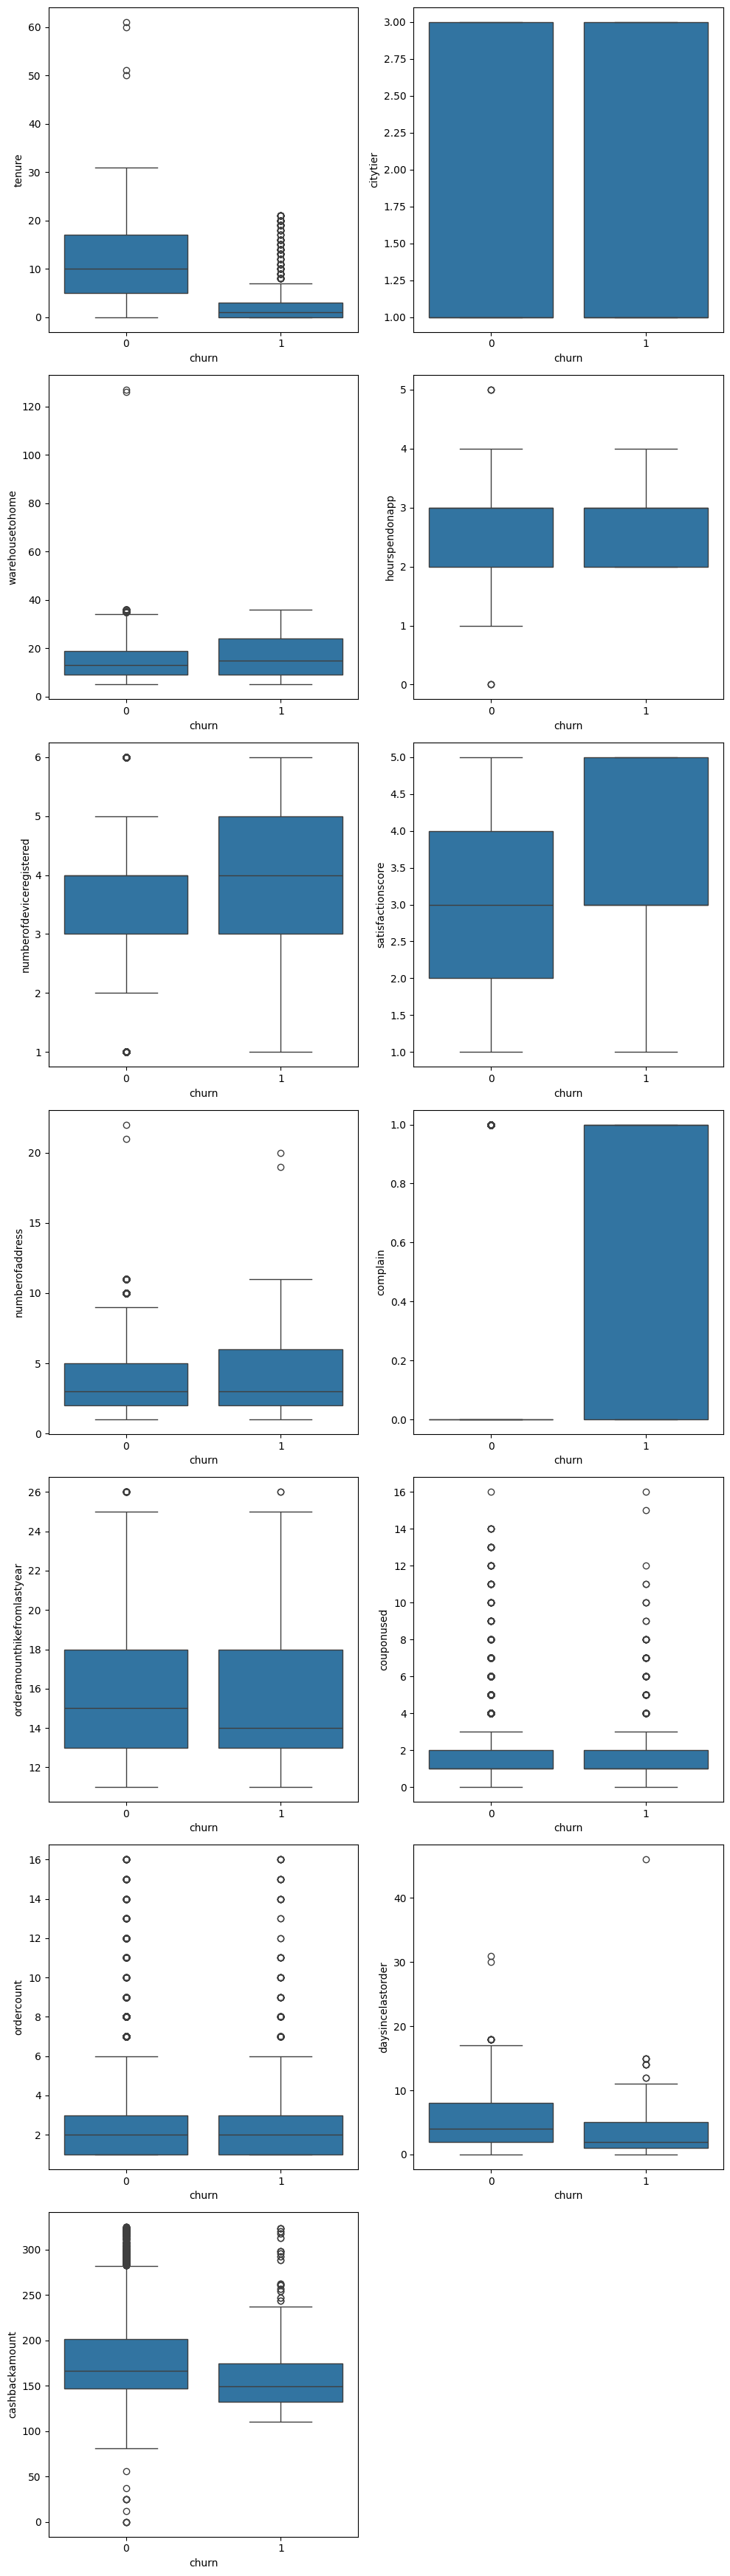

In [ ]:
#churn vs numerical_col
import math
import seaborn as sns
import matplotlib.pyplot as plt

target = 'churn'
df_no_ch = df.drop(columns = ['churn', 'customerid'])
cols_num = df_no_ch.select_dtypes(include = 'number').columns

n_cols = 2
n_rows = math.ceil(len(cols_num) / n_cols)


plt.figure(figsize = (10, n_rows * 5))

for i, col in enumerate(cols_num):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.boxplot(x = target, y = col, data = df)
plt.tight_layout()
plt.show()

# 觀察churn vs numerical_col:
tenure時間越短越容易流失
>若綜合其他圖表 代表只購買高單價物品後就不再回購
>可以提供銷售方式 如"累積點數"讓客人回購率增加 且不限於高單價物品

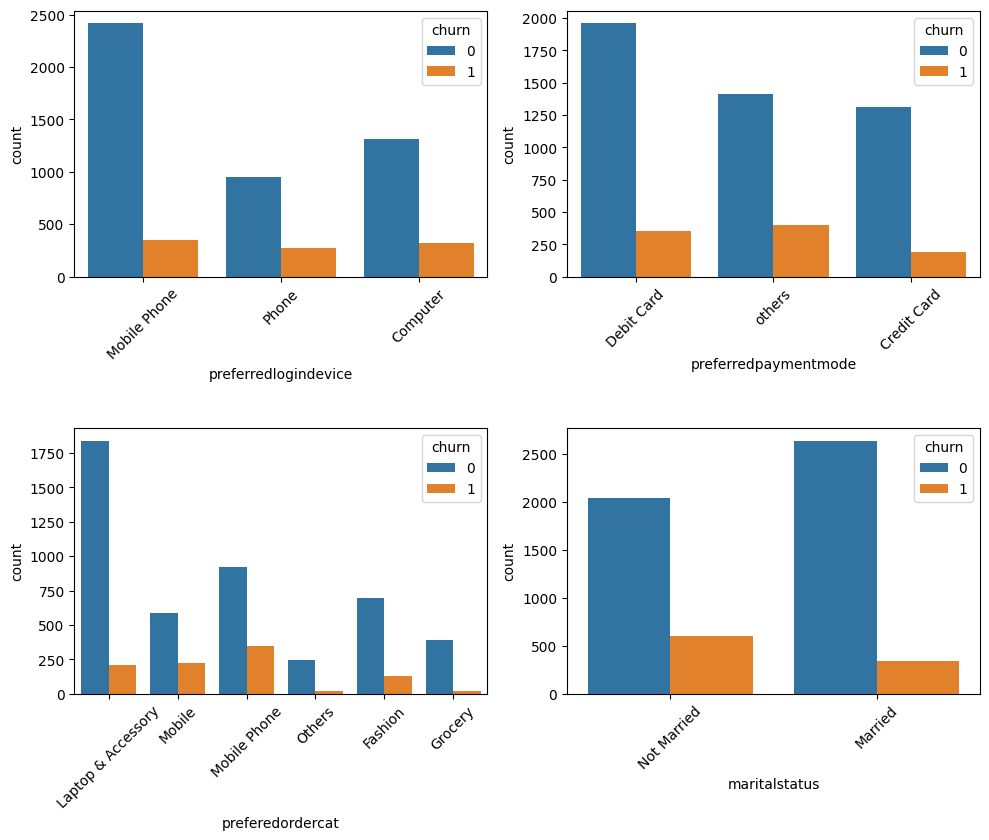

In [ ]:
#churn vs categorical_col
import math
import seaborn as sns
import matplotlib.pyplot as plt

target = 'churn'
df_no_ch = df.drop(columns = ['churn'])
cols_cat = df_no_ch.select_dtypes(include = 'object').columns

n_cols = 2
n_rows = math.ceil(len(cols_num) / n_cols)


plt.figure(figsize = (10, n_rows * 4))

for i, col in enumerate(cols_cat):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.countplot(x = col, hue = target, data = df)
  plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# 觀察churn vs numerical_col 和 churn vs categorical_col:

可移除

citytier

warehouse_to_home：雖然有些極端值 但整體分布差異不明顯

hourspendonapp

orderamounthikefromlastyear

gender：流失比例差異不大，可能不是關鍵特徵

進階觀察(保留)

memberofaddress: 差距不大 可進一步觀察

couponused: 極端值微多

ordercount: 極端值微多

daysincelastyear: 差距些微

cashbackamount: 差距些微

保留

tenure：流失者的服務時間明顯偏短，可能是早期流失

numberofdeviceeegistered: 用較多設備的人較容易流失?

satisfaction_score：明顯差距

complain：流失者幾乎都是在有客訴的客人

preferredlogindevice：Computer 使用者流失比例偏高

preferredpaymentmode：Credit Card 與 COD 佔流失較高，付款方式影響留存?

preferredordercat：明顯流失差異，可能需要進一步用比例圖或計算 churn rate 才能判斷是否需要進一步轉換或合併？

maritalstatus：Married使用者未流失比例明顯高於其他 可能生活型態穩定?

In [ ]:
df = df.drop(columns = ['citytier', 'warehousetohome', 'hourspendonapp', 'orderamounthikefromlastyear', 'gender', 'customerid'])

In [ ]:
print(df.columns)

Index(['churn', 'tenure', 'preferredlogindevice', 'preferredpaymentmode',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain', 'couponused',
       'ordercount', 'daysincelastorder', 'cashbackamount'],
      dtype='object')


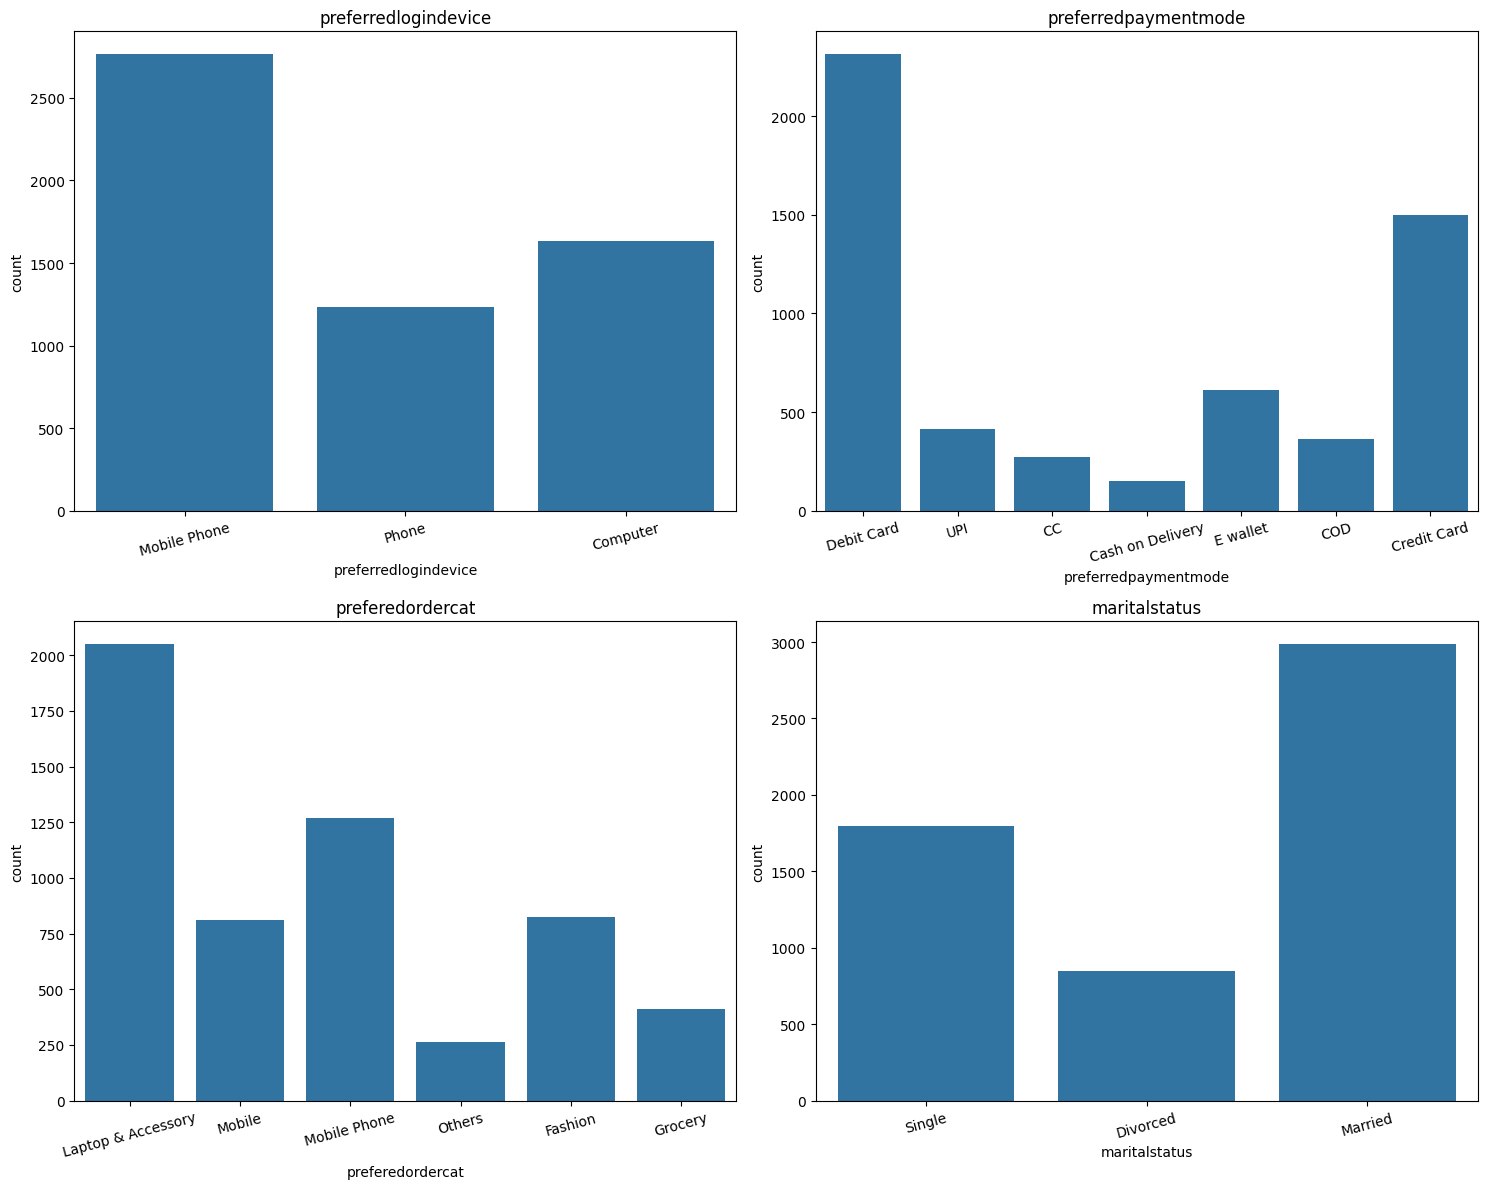

In [ ]:
#離散型資料分布
cat_col = df.select_dtypes(include = 'object').columns

plt.figure(figsize = (15, len(cat_col)*3))
for i, col in enumerate(cat_col):
  plt.subplot(math.ceil(len(cat_col)/2), 2, i + 1)
  sns.countplot(data = df, x = col)
  plt.title(f'{col}')
  plt.xticks(rotation = 15)
plt.tight_layout()
plt.show()

# 觀察離散型資料分布:
preferredlogindevic: one-hot 依照業務性質合併phone和mobile 先不合

preferredpaymentmode: 'UPI''CC''CashonDelivery''Ewallet''COD'合併為 "others" 後用one-hot

preferedordercat: one-hot

maritalstatus: 將 single 和 divorsed 合併為 not_married? one-hot

In [ ]:
df['maritalstatus'] = df['maritalstatus'].replace({
    'Single': 'Not Married',
    'Divorced': 'Not Married'
})
tran_oth_fea = ['UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD']
df["preferredpaymentmode"] = df["preferredpaymentmode"].apply(lambda x : "others" if x in tran_oth_fea else x)

In [ ]:
print(df["preferredpaymentmode"].unique())
print(df['maritalstatus'].unique())

['Debit Card' 'others' 'Credit Card']
['Not Married' 'Married']


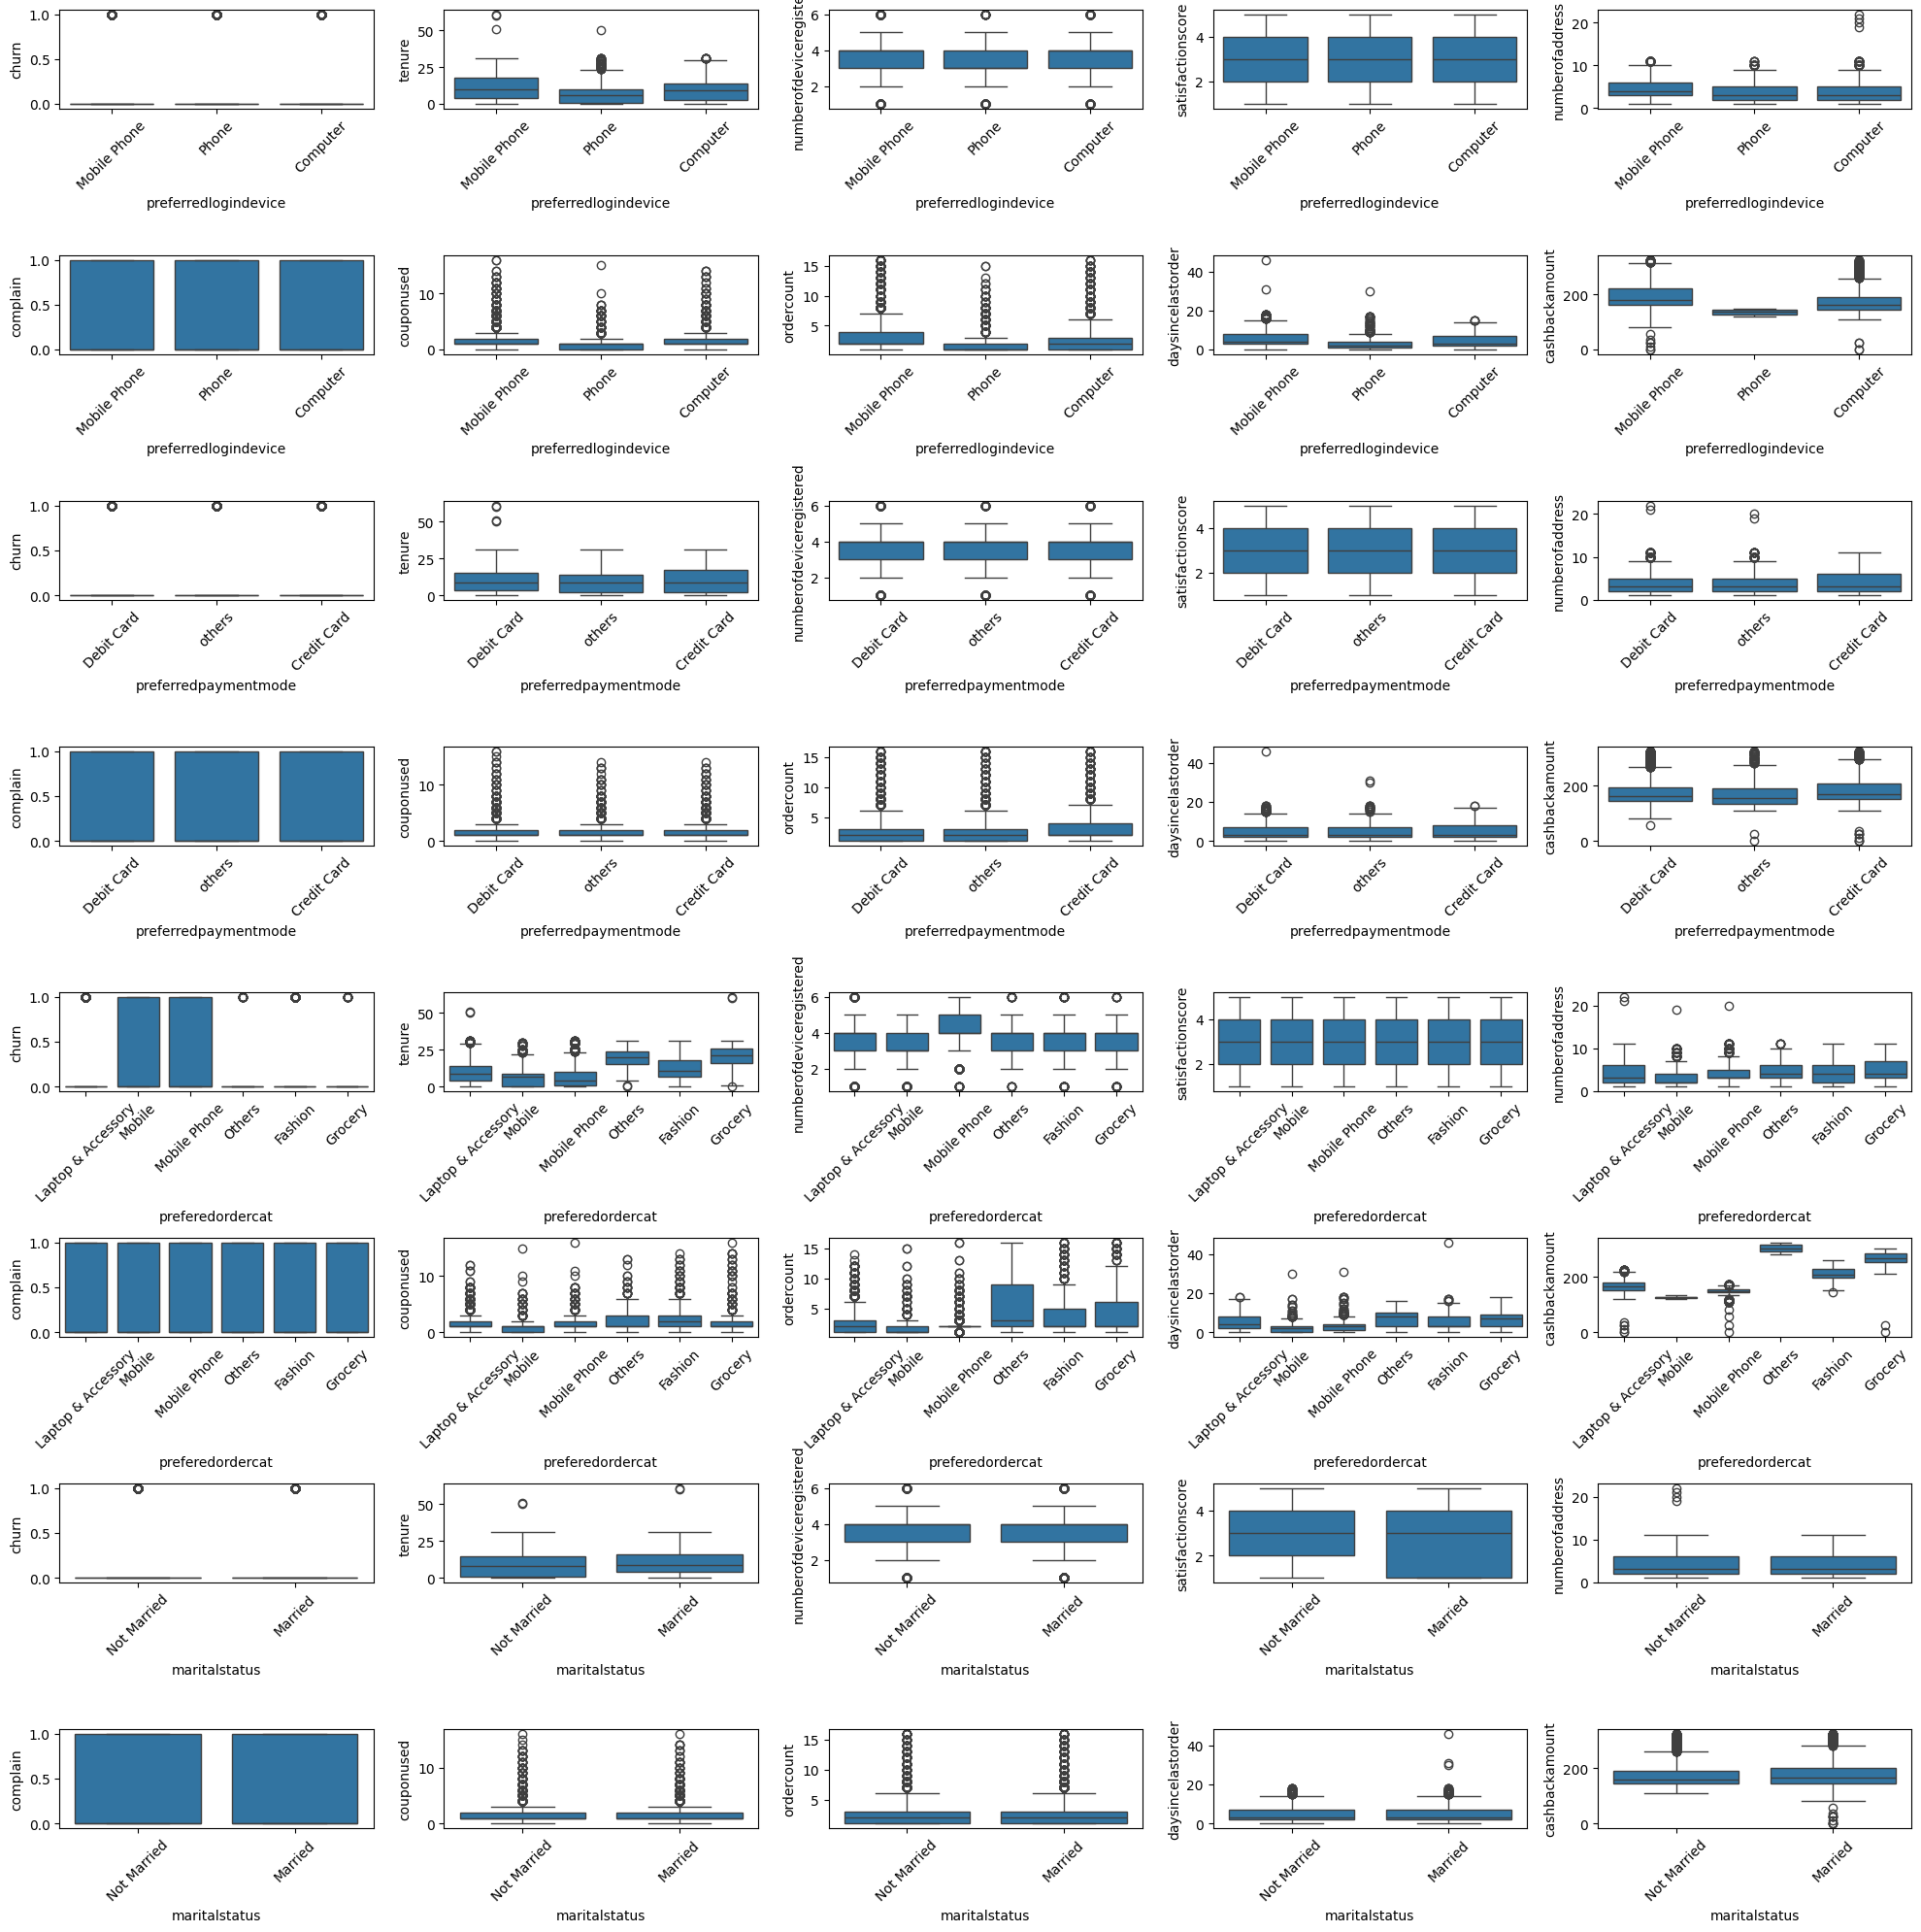

In [ ]:
#離散vs連續
cat_cols = df.select_dtypes(include = 'object').columns
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns

plt.figure(figsize = (20 , len(cat_col) * 5))
plt_num = 1

for cat in cat_cols:
  for num in num_cols:
    plt.subplot(math.ceil(len(cat_cols) * len(num_cols)/5), 5, plt_num)
    sns.boxplot(x = df[cat], y = df[num])
    plt.xticks(rotation = 45)
    plt_num += 1
plt.tight_layout()
plt.show()

# 觀察離散資料vs連續資料:

mobilephone註冊的數量明顯較多

買mobilephone和phone 流失數量遠高於其他類別 tenure低於其他類別

>高單價一次一隻

>可以做買mobile的行銷策略 增加其他商品的購買量

回饋金額 於各 購買項目 範圍差異大
>較低單價的物品因持續購買而累積回饋?
>回饋策略於各類別產品的內容不同?



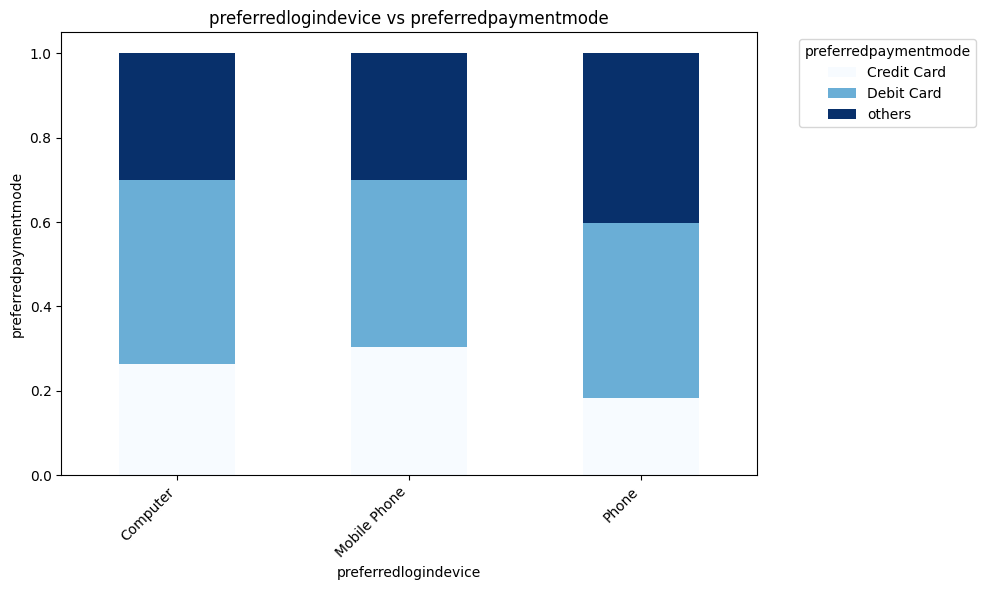

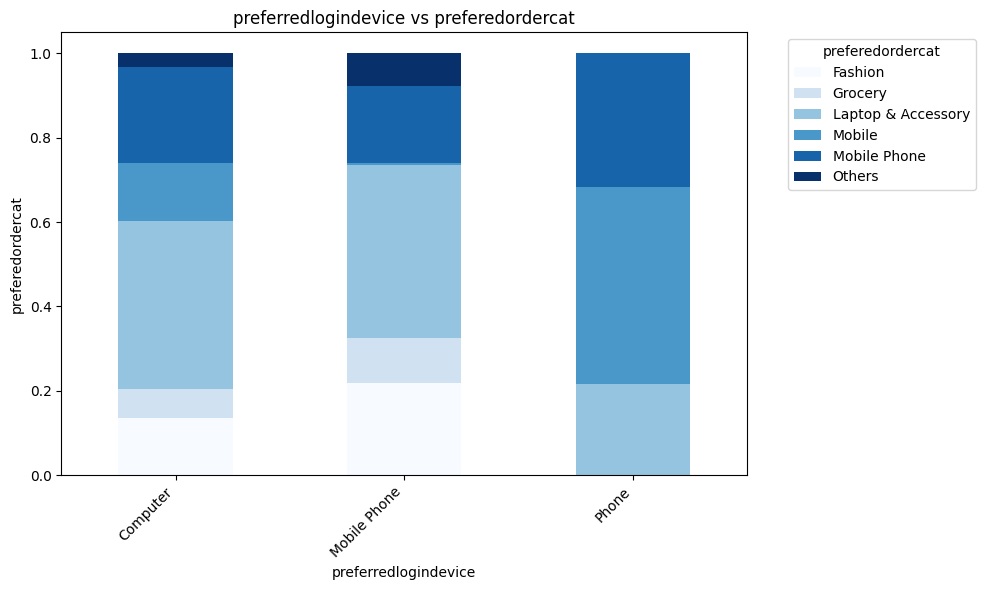

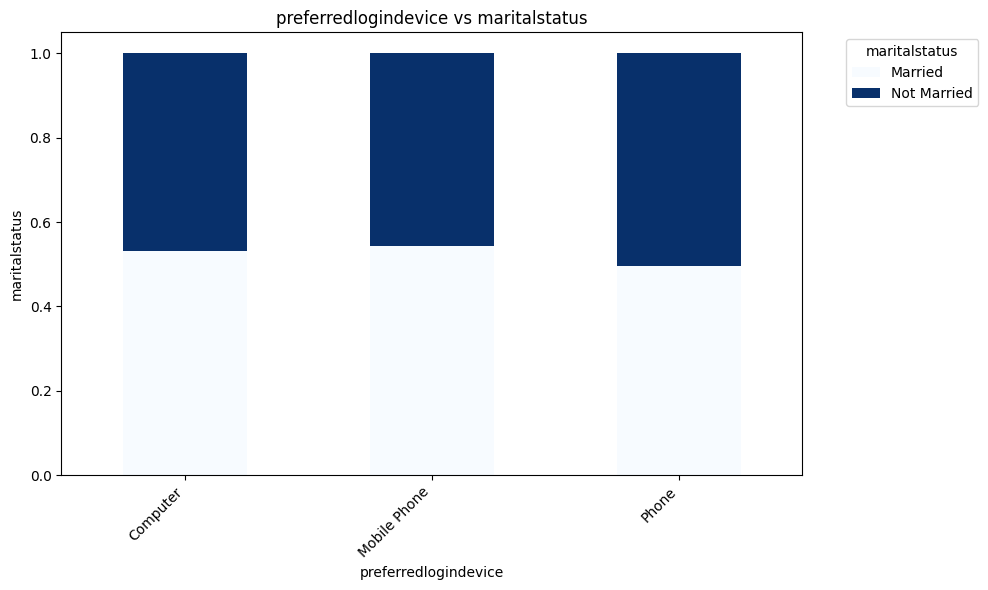

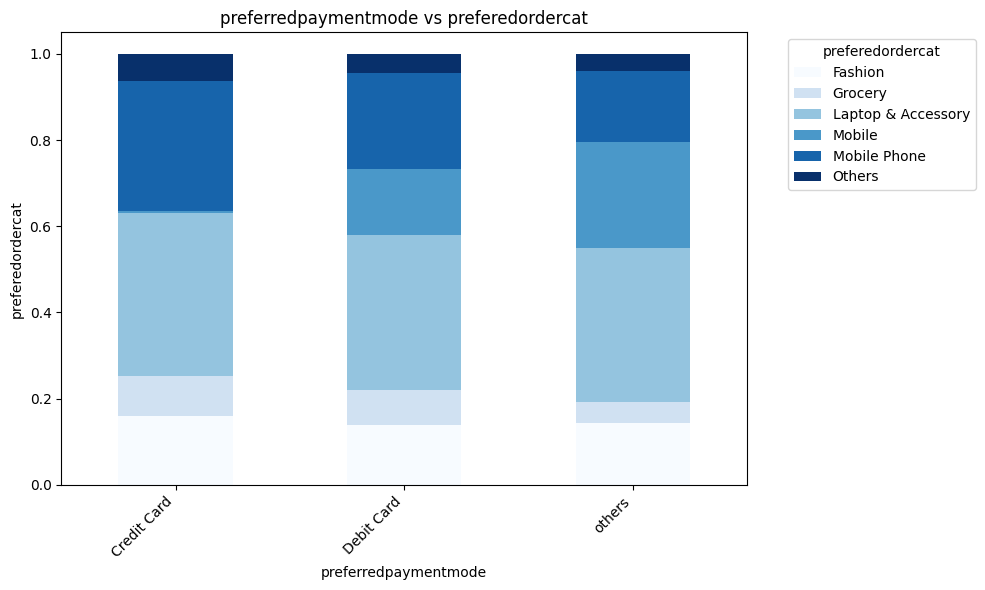

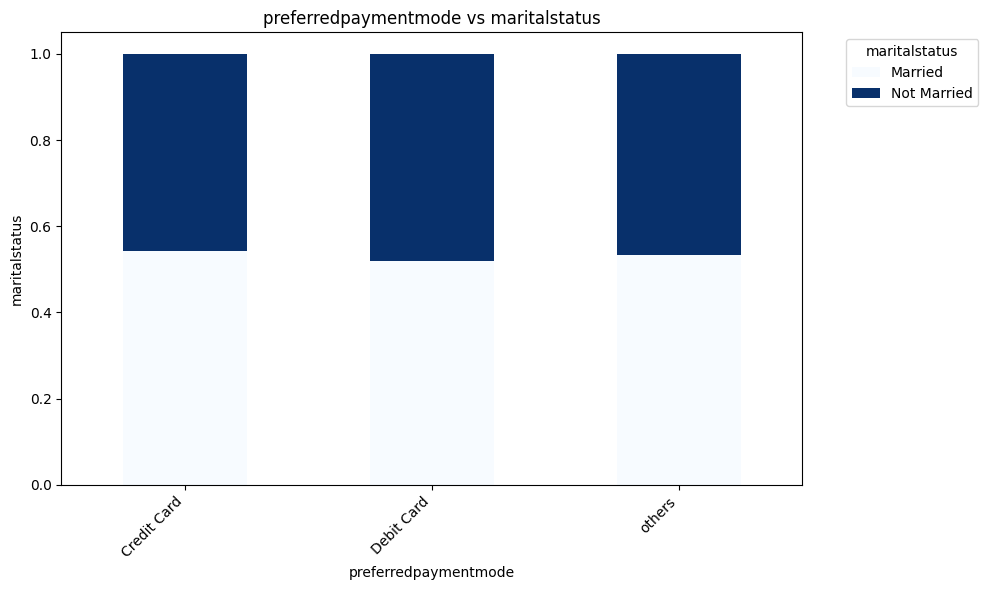

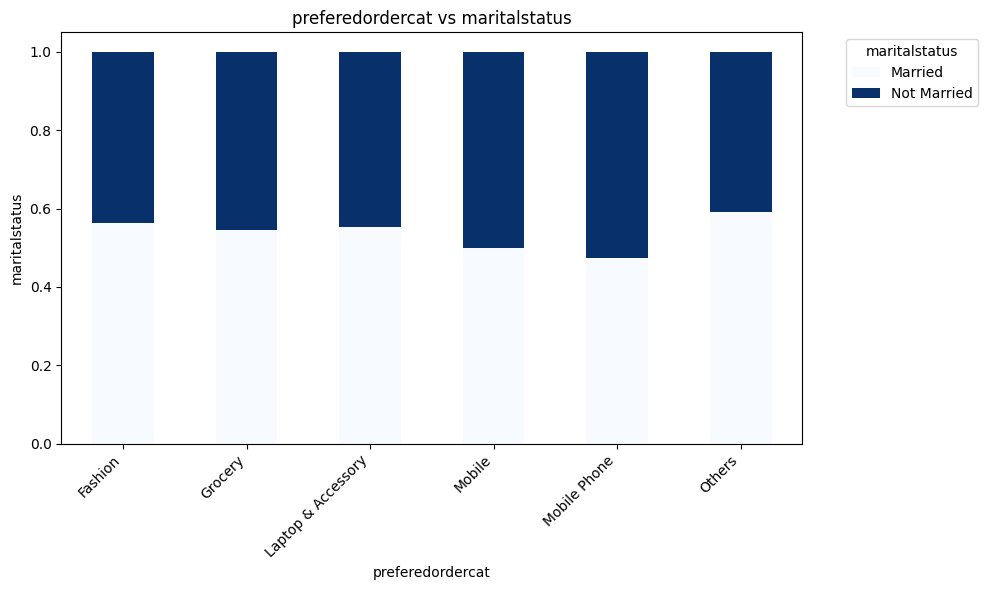

In [ ]:
#離散vs離散
cat_cols = df.select_dtypes(include='object').columns

for i in range(len(cat_cols)):
    for j in range(i + 1, len(cat_cols)):
        cross_tab = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]], normalize='index')

        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Blues')
        plt.title(f'{cat_cols[i]} vs {cat_cols[j]}')
        plt.ylabel(cat_cols[j])
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=cat_cols[j], bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# 觀察離散資料:

用電腦購買的品項類別較多
>可改善手機的介面 使用更方便?

用信用卡購買手機的人極少
>都一次付清?
>mobile與mobile應合併?

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
  print(f"{col}: {df[col].unique()}")

churn: [1 0]
tenure: [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
numberofdeviceregistered: [3 4 5 2 1 6]
satisfactionscore: [2 3 5 4 1]
numberofaddress: [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
complain: [1 0]
couponused: [ 1.  0.  4.  2.  9.  6. 11. nan  7. 12. 10.  5.  3. 13. 15.  8. 14. 16.]
ordercount: [ 1.  6.  2. 15.  4.  7.  3.  9. nan 11.  5. 12. 10.  8. 13. 14. 16.]
daysincelastorder: [ 5.  0.  3.  7.  2.  1.  8.  6.  4. 15.  9. 11. 10. nan 13. 12. 17. 16.
 14. 30. 46. 18. 31.]
cashbackamount: [159.93 120.9  120.28 ... 173.77 287.91 173.78]


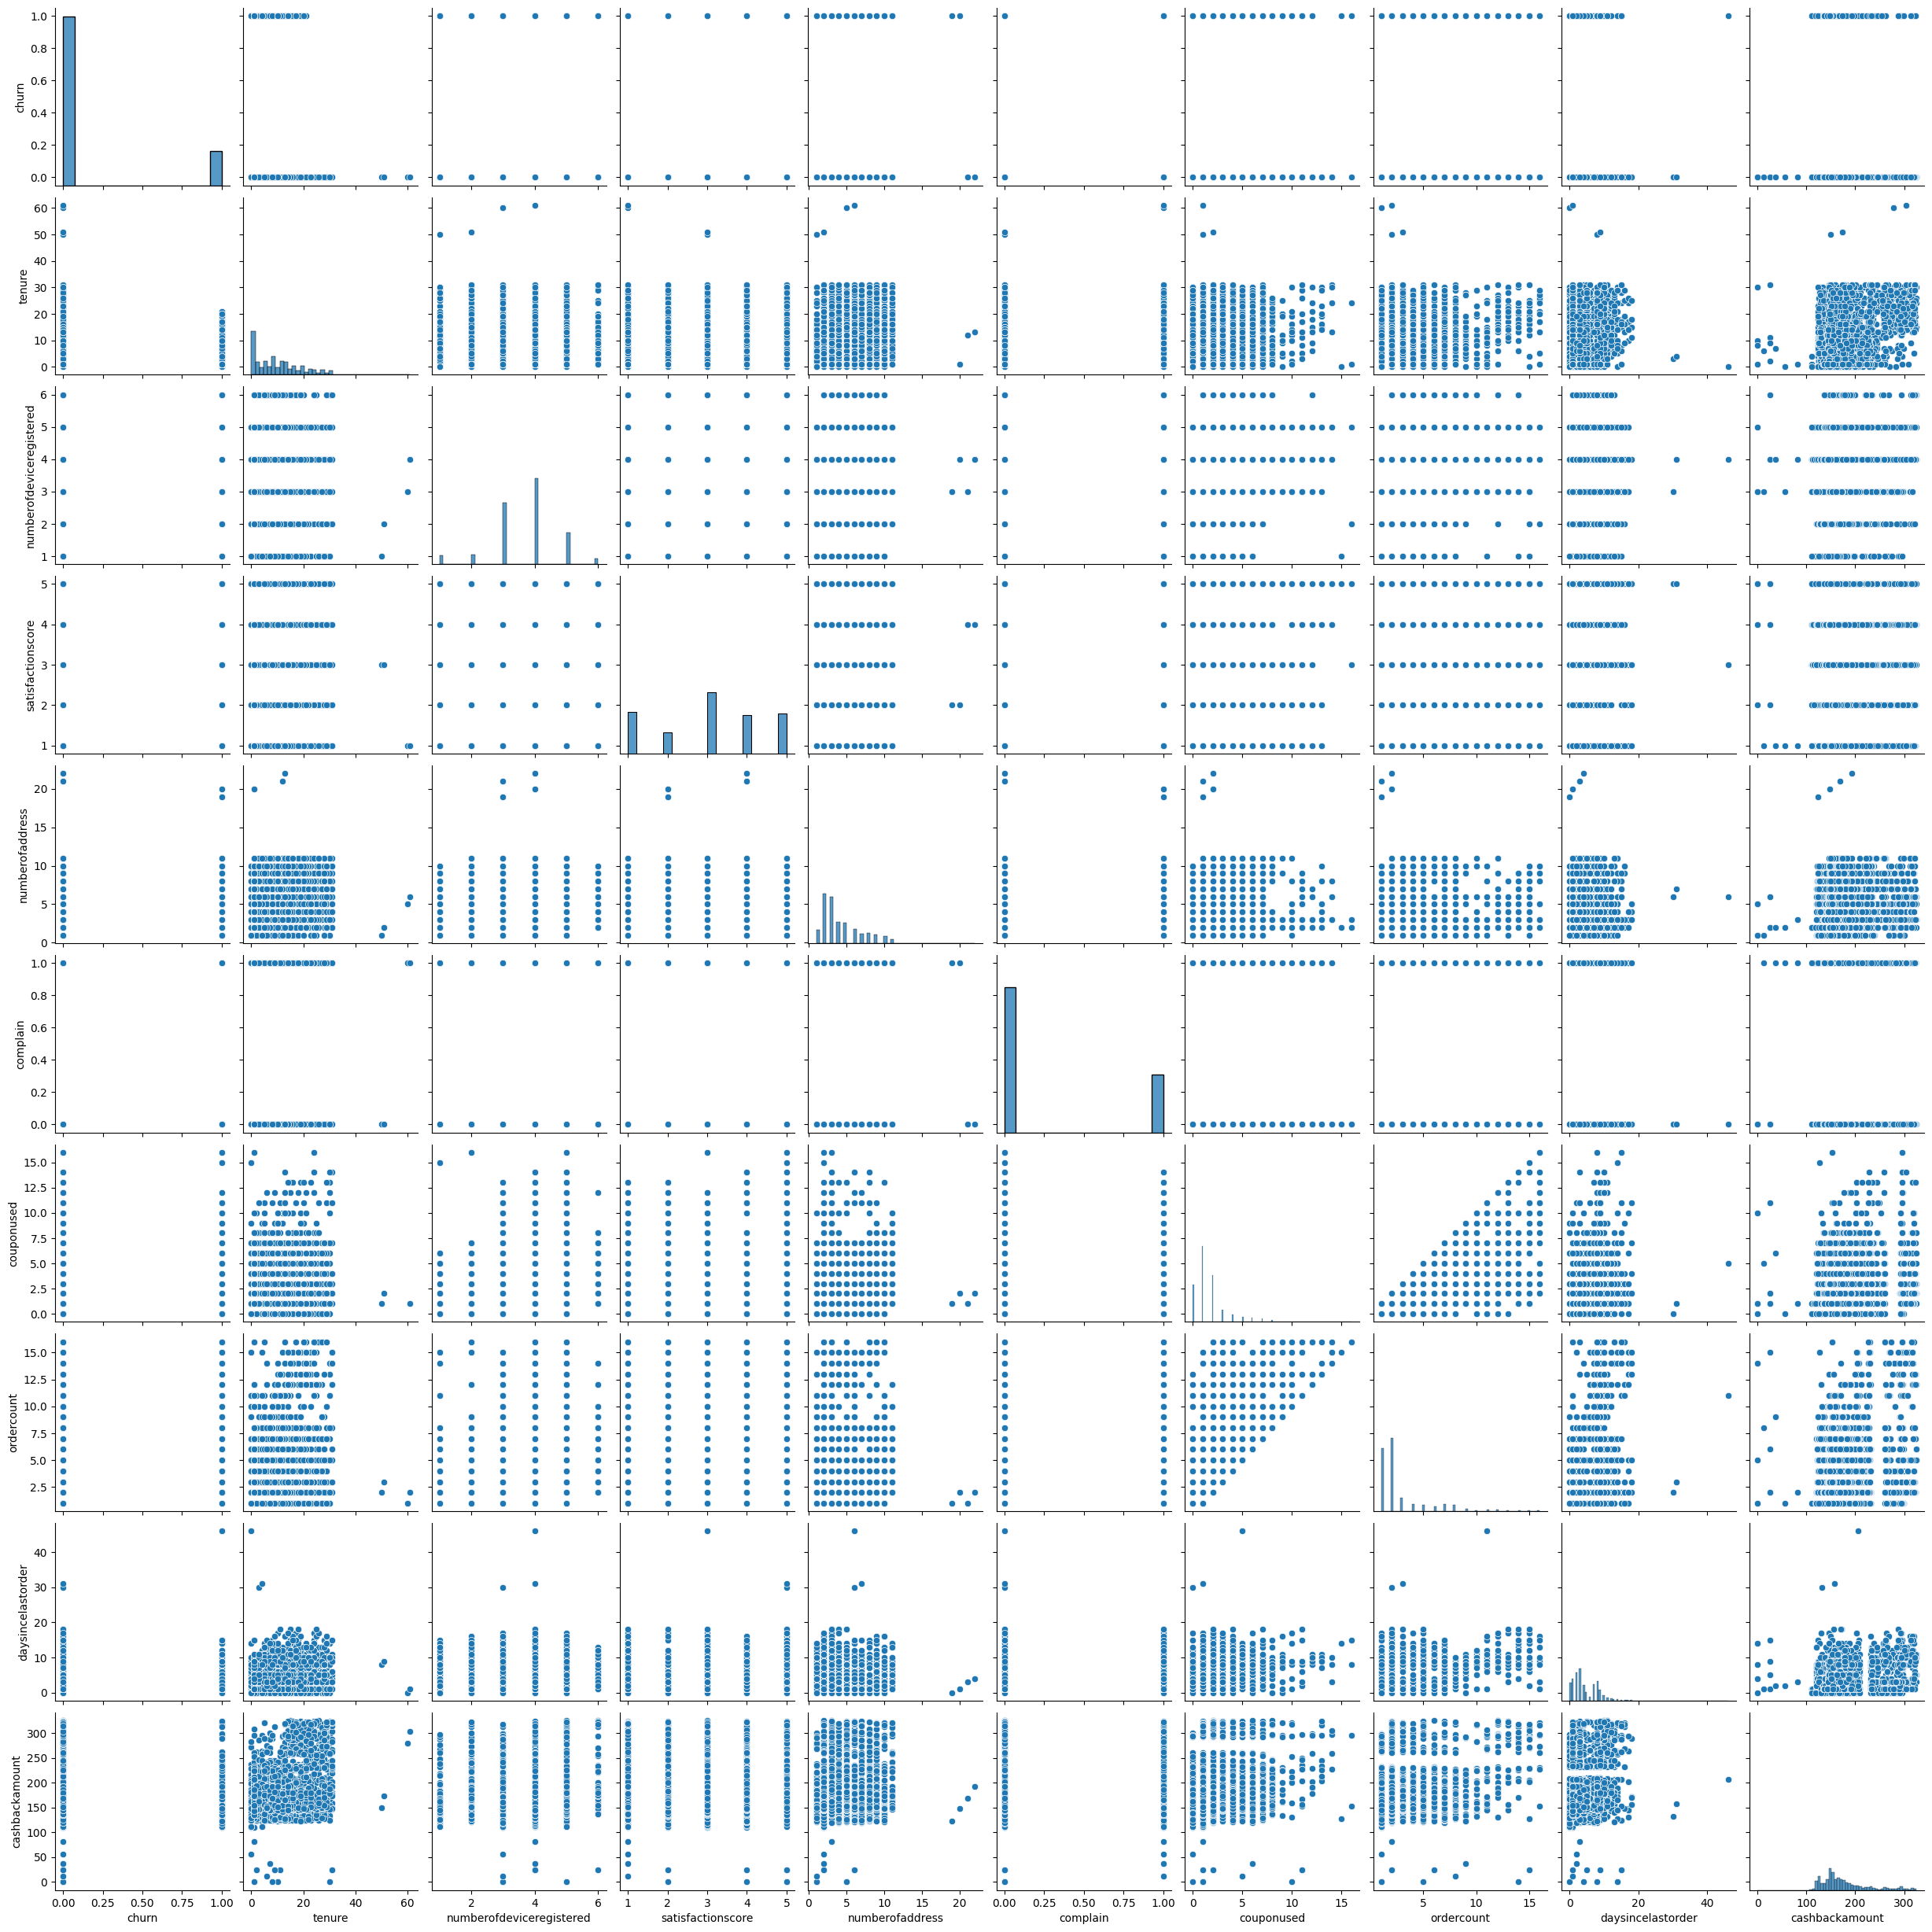

In [ ]:
#連續vs連續
sns.pairplot(df[num_cols])
plt.show()

# 觀察連續資料:
比起未流失客戶 流失的客戶的回饋金額普遍較高
>憑連續vs離散了解 購買手機的客人流失率較高 也就表示可以發想"藉由賣手機去新增其他商品的促銷?

註冊設備數量為3-5個 的上個月使用票卷數量偏多

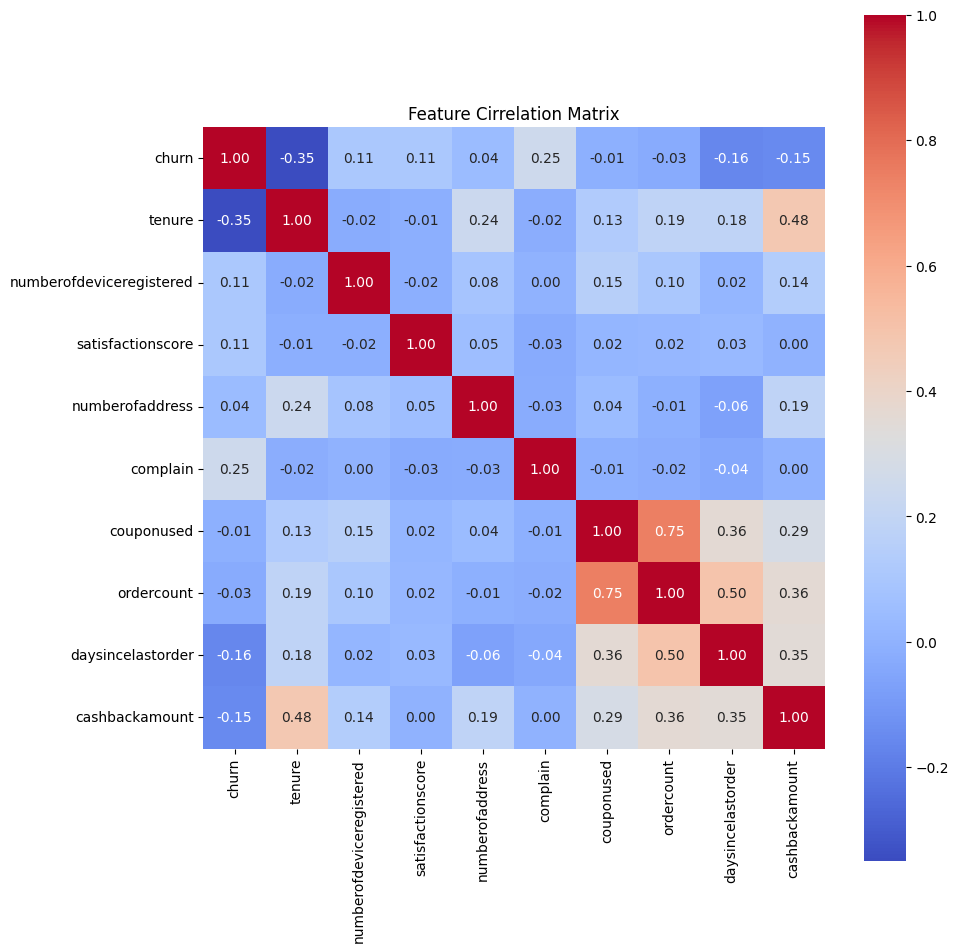

In [ ]:
#關聯矩陣
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', square = True)
plt.title('Feature Cirrelation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

churn: 2
tenure: 36
preferredlogindevice: 3
preferredpaymentmode: 3
numberofdeviceregistered: 6
preferedordercat: 6
satisfactionscore: 5
maritalstatus: 2
numberofaddress: 15
complain: 2
couponused: 17
ordercount: 16
daysincelastorder: 22
cashbackamount: 2586


In [ ]:
df_num = df.select_dtypes(include = 'number')
df_lab_ten = [col for col in df_num.columns if df[col].nunique() > 10]
df_lab_ten

['tenure',
 'numberofaddress',
 'couponused',
 'ordercount',
 'daysincelastorder',
 'cashbackamount']

In [ ]:
#極端值處理
import numpy as np

for col in df_lab_ten:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df.loc[(df[col] < Q1 - 1.5 * IQR) & (df[col] > Q3 + 1.5 * IQR)] = np.nan

In [ ]:
print(df.isnull().sum()) #total:5630

churn                         0
tenure                      264
preferredlogindevice          0
preferredpaymentmode          0
numberofdeviceregistered      0
preferedordercat              0
satisfactionscore             0
maritalstatus                 0
numberofaddress               0
complain                      0
couponused                  256
ordercount                  258
daysincelastorder           307
cashbackamount                0
dtype: int64


In [ ]:
cols_na = ["tenure", "couponused", "ordercount", "daysincelastorder"]
for col in cols_na:
  print(col)
  print(df[col].unique())
  print('-'*80)

tenure
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
--------------------------------------------------------------------------------
couponused
[ 1.  0.  4.  2.  9.  6. 11. nan  7. 12. 10.  5.  3. 13. 15.  8. 14. 16.]
--------------------------------------------------------------------------------
ordercount
[ 1.  6.  2. 15.  4.  7.  3.  9. nan 11.  5. 12. 10.  8. 13. 14. 16.]
--------------------------------------------------------------------------------
daysincelastorder
[ 5.  0.  3.  7.  2.  1.  8.  6.  4. 15.  9. 11. 10. nan 13. 12. 17. 16.
 14. 30. 46. 18. 31.]
--------------------------------------------------------------------------------


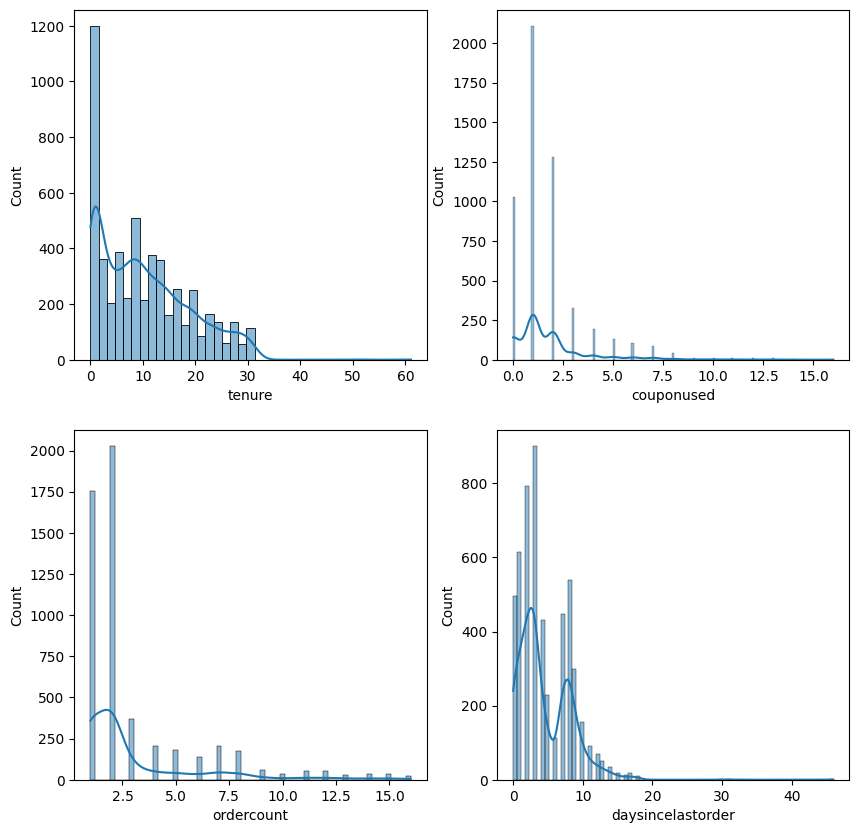

In [ ]:
plt.figure(figsize = (10, 10))
for i, col in enumerate(cols_na):
  plt.subplot(round(len(cols_na)/2), 2, i + 1)
  sns.histplot(data = df, x = col, kde = True)

tenure 中位數

couponused 中位數

ordercount 中位數

daysincelastorder 中位數

In [ ]:
#填補 缺失值 及 刪除的極端值
cols_median = ["tenure", "couponused", "ordercount", "daysincelastorder"]

for col in cols_median:
  df[col].fillna(df[col].median(), inplace = True)

/tmp/ipython-input-4199372421.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)


In [ ]:
print(df.isnull().sum())

churn                       0
tenure                      0
preferredlogindevice        0
preferredpaymentmode        0
numberofdeviceregistered    0
preferedordercat            0
satisfactionscore           0
maritalstatus               0
numberofaddress             0
complain                    0
couponused                  0
ordercount                  0
daysincelastorder           0
cashbackamount              0
dtype: int64


In [ ]:
for col in df.columns:
  print(f"{col}: {df[col].unique()}")

churn: [1 0]
tenure: [ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
preferredlogindevice: ['Mobile Phone' 'Phone' 'Computer']
preferredpaymentmode: ['Debit Card' 'others' 'Credit Card']
numberofdeviceregistered: [3 4 5 2 1 6]
preferedordercat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
satisfactionscore: [2 3 5 4 1]
maritalstatus: ['Not Married' 'Married']
numberofaddress: [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
complain: [1 0]
couponused: [ 1.  0.  4.  2.  9.  6. 11.  7. 12. 10.  5.  3. 13. 15.  8. 14. 16.]
ordercount: [ 1.  6.  2. 15.  4.  7.  3.  9. 11.  5. 12. 10.  8. 13. 14. 16.]
daysincelastorder: [ 5.  0.  3.  7.  2.  1.  8.  6.  4. 15.  9. 11. 10. 13. 12. 17. 16. 14.
 30. 46. 18. 31.]
cashbackamount: [159.93 120.9  120.28 ... 173.77 287.91 173.78]


In [ ]:
#分割資料集 準備特徵工程
y = df['churn']
x = df.drop('churn', axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

to_onehot_lab = [
    "preferredlogindevice",
    "preferredpaymentmode",
    "preferedordercat",
    "maritalstatus"
]
to_ordi_lab = [
    "satisfactionscore"
]


encoder = ColumnTransformer(
    transformers = [
        ('one', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False ), to_onehot_lab),
        ('ord', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1), to_ordi_lab)
        ],
    remainder = 'passthrough'
)

encoded_arr_train = encoder.fit_transform(x_train)
x_train = pd.DataFrame(
    encoded_arr_train,
    columns = encoder.get_feature_names_out(),
    index = x_train.index
)

encoded_arr_test = encoder.transform(x_test)
x_test = pd.DataFrame(
    encoded_arr_test,
    columns = encoder.get_feature_names_out(),
    index = x_test.index
)


clean_columns = [col.split('__')[-1] for col in encoder.get_feature_names_out()]
x_train.columns = clean_columns
x_test.columns = clean_columns


for col in x_train.columns:
  print(f"{col}: {x_train[col].unique()}")
for col in x_test.columns:
  print(f"{col}: {x_test[col].unique()}")

preferredlogindevice_Computer: [0. 1.]
preferredlogindevice_Mobile Phone: [1. 0.]
preferredlogindevice_Phone: [0. 1.]
preferredpaymentmode_Credit Card: [0. 1.]
preferredpaymentmode_Debit Card: [1. 0.]
preferredpaymentmode_others: [0. 1.]
preferedordercat_Fashion: [0. 1.]
preferedordercat_Grocery: [0. 1.]
preferedordercat_Laptop & Accessory: [0. 1.]
preferedordercat_Mobile: [0. 1.]
preferedordercat_Mobile Phone: [1. 0.]
preferedordercat_Others: [0. 1.]
maritalstatus_Married: [0. 1.]
maritalstatus_Not Married: [1. 0.]
satisfactionscore: [3. 2. 1. 0. 4.]
tenure: [ 1. 17.  0.  9.  4.  7.  2. 23.  3. 12.  8. 13.  5. 29. 11. 19. 15. 10.
 28. 20. 14. 22. 25.  6. 30. 21. 31. 18. 16. 24. 27. 26. 61. 60. 50. 51.]
numberofdeviceregistered: [4. 5. 3. 2. 1. 6.]
numberofaddress: [ 3.  2.  1.  8.  4.  5.  9.  6. 11. 10.  7. 19. 22.]
complain: [1. 0.]
couponused: [ 1.  2.  0.  3.  4.  6.  5. 14.  8.  7.  9. 15. 16. 13. 11. 10. 12.]
ordercount: [ 2.  1.  7.  9.  4.  6. 10.  5.  3.  8. 15. 12. 11. 14. 1

In [ ]:
fs_col = ["ordercount", "daysincelastorder", "cashbackamount"]

<function matplotlib.pyplot.show(close=None, block=None)>

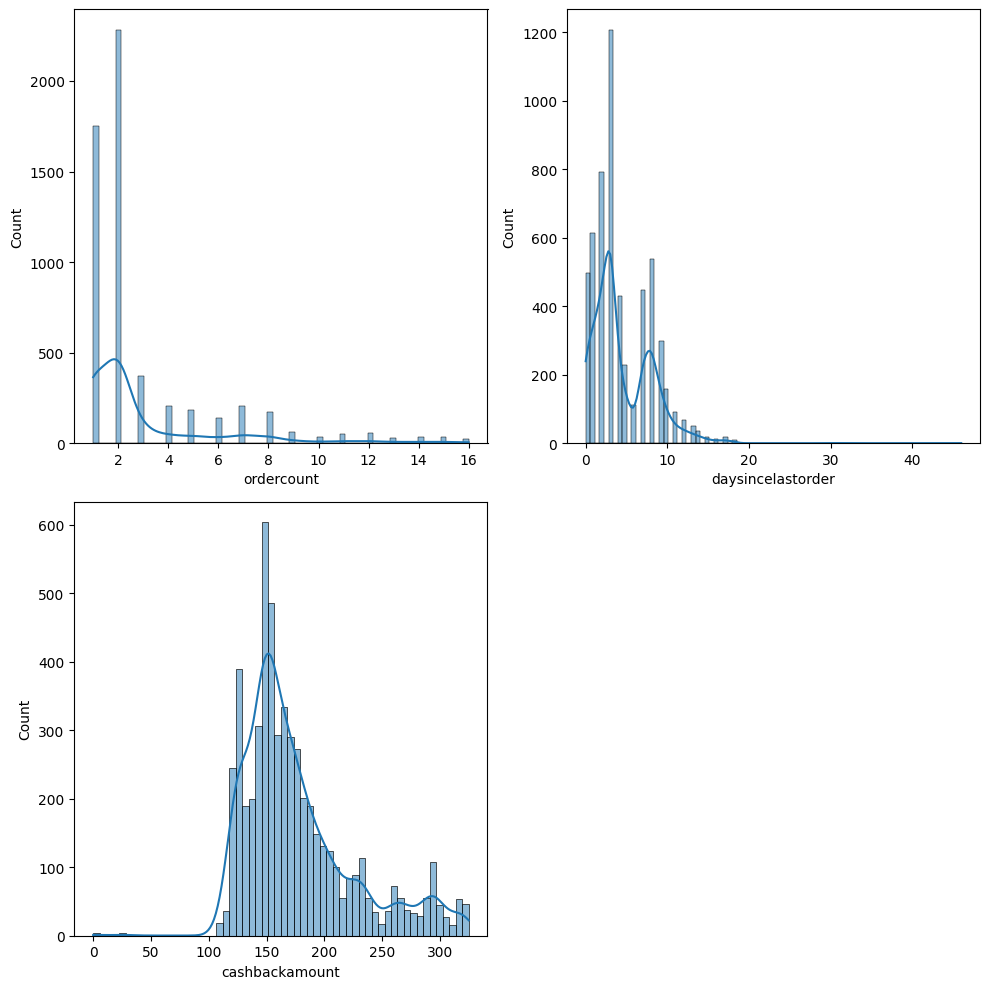

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.figure(figsize = (10, 10))
for i, col in enumerate(fs_col):
  plt.subplot(math.ceil(len(fs_col)/2), 2, i + 1)
  sns.histplot(data = df, x = col, kde = True)
  plt.tight_layout()
plt.show

In [ ]:
#feature scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler_rob = RobustScaler()
x_train[["cashbackamount"]] = scaler_rob.fit_transform(x_train[["cashbackamount"]])
x_test[["cashbackamount"]] = scaler_rob.transform(x_test[["cashbackamount"]])


minmax_col = ["tenure", "ordercount", "daysincelastorder"]
scaler_mm = MinMaxScaler()
x_train[[col for col in minmax_col]] = scaler_mm.fit_transform(x_train[minmax_col])
x_test[[col for col in minmax_col]] = scaler_mm.transform(x_test[minmax_col])


x_train = pd.DataFrame(
    x_train.values,
    columns = x_train.columns,
    index = x_train.index
    )
x_test = pd.DataFrame(
    x_test.values,
    columns = x_test.columns,
    index = x_test.index
    )

for col in x_train.columns:
  print(f"{col}: {x_train[col].unique()}")
for col in x_test.columns:
  print(f"{col}: {x_test[col].unique()}")

preferredlogindevice_Computer: [0. 1.]
preferredlogindevice_Mobile Phone: [1. 0.]
preferredlogindevice_Phone: [0. 1.]
preferredpaymentmode_Credit Card: [0. 1.]
preferredpaymentmode_Debit Card: [1. 0.]
preferredpaymentmode_others: [0. 1.]
preferedordercat_Fashion: [0. 1.]
preferedordercat_Grocery: [0. 1.]
preferedordercat_Laptop & Accessory: [0. 1.]
preferedordercat_Mobile: [0. 1.]
preferedordercat_Mobile Phone: [1. 0.]
preferedordercat_Others: [0. 1.]
maritalstatus_Married: [0. 1.]
maritalstatus_Not Married: [1. 0.]
satisfactionscore: [3. 2. 1. 0. 4.]
tenure: [0.01639344 0.27868852 0.         0.14754098 0.06557377 0.1147541
 0.03278689 0.37704918 0.04918033 0.19672131 0.13114754 0.21311475
 0.08196721 0.47540984 0.18032787 0.31147541 0.24590164 0.16393443
 0.45901639 0.32786885 0.2295082  0.36065574 0.40983607 0.09836066
 0.49180328 0.3442623  0.50819672 0.29508197 0.26229508 0.39344262
 0.44262295 0.42622951 1.         0.98360656 0.81967213 0.83606557]
numberofdeviceregistered: [4. 5.

In [ ]:
#選擇LogisticRegression訓練 觀察表現
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"acc = {accuracy : .2f}", "\n" + "-" * 50)

print(confusion_matrix(y_test, y_pred), "\n" + "-" * 50)
print(classification_report(y_test, y_pred))

In [ ]:
#因LogisticRegression表現不盡理想 選擇RandomForestClassifier訓練
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"acc = {accuracy : .2f}", "\n" + "-" * 50)

print(confusion_matrix(y_test, y_pred), "\n" + "-" * 50)
print(classification_report(y_test, y_pred))

acc =  0.96 
--------------------------------------------------
[[936   5]
 [ 43 142]] 
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       941
           1       0.97      0.77      0.86       185

    accuracy                           0.96      1126
   macro avg       0.96      0.88      0.92      1126
weighted avg       0.96      0.96      0.96      1126



In [ ]:
#調參
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10]
}
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200]})

In [ ]:
print("best_para：", grid_search.best_params_)

best_para： {'max_depth': None, 'n_estimators': 200}


In [ ]:
model_best = RandomForestClassifier(n_estimators = 200, max_depth = None, random_state = 42)
model_best.fit(x_train, y_train)
y_pred = model_best.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"acc = {accuracy : .2f}" + "\n" + ">")
print(confusion_matrix(y_test, y_pred), "\n" +">")
print(classification_report(y_test, y_pred))

acc =  0.96
>
[[935   6]
 [ 42 143]] 
>
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       941
           1       0.96      0.77      0.86       185

    accuracy                           0.96      1126
   macro avg       0.96      0.88      0.92      1126
weighted avg       0.96      0.96      0.96      1126



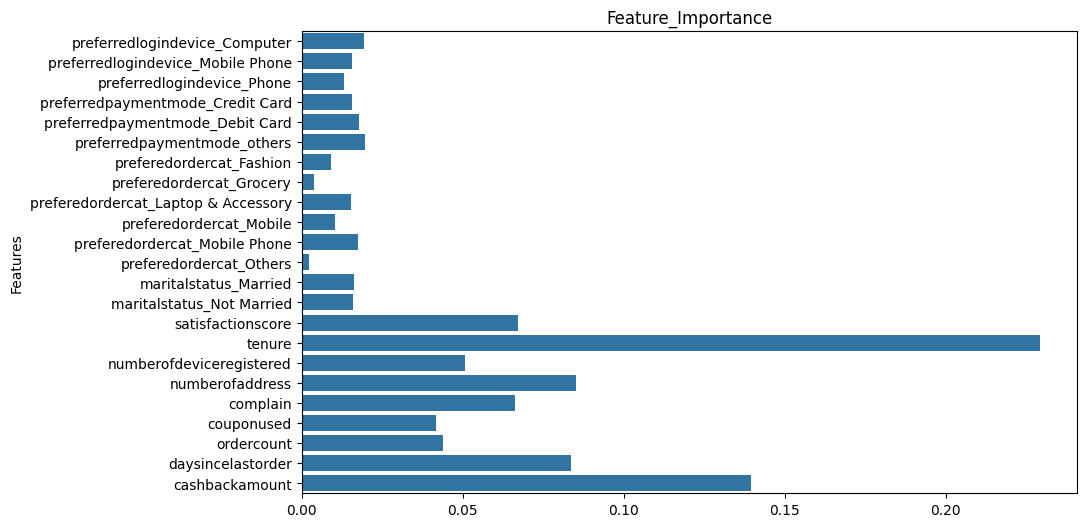

In [ ]:
#了解預測時對各特徵的依賴性
feature_import = model_best.feature_importances_
features = x_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_import, y=features)
plt.title("Feature_Importance")
plt.ylabel('Features')
plt.show()

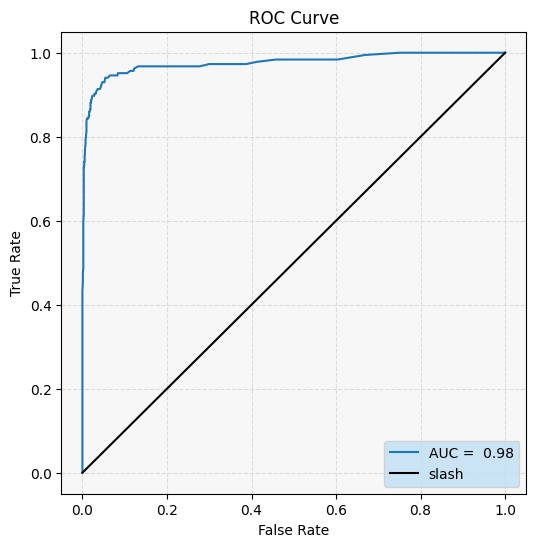

In [ ]:
#結果顯示 模型在不同閾值下表現優秀
from sklearn.metrics import roc_curve, roc_auc_score

y_true = y_test
y_proba = model_best.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

fig, ax = plt.subplots(figsize = (6, 6))
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#f7f7f7')

ax.plot(fpr, tpr, label = f'AUC = {auc : .2f}')
ax.plot([0,1], [0,1], 'k-', label = "slash")

ax.set_xlabel("False Rate")
ax.set_ylabel("True Rate")
ax.set_title("ROC Curve")

ax.legend(loc = 'lower right', frameon = True, facecolor = '#c0e0f5')
ax.grid(True, color = '#dcdcdc', linestyle = '--')
plt.show()

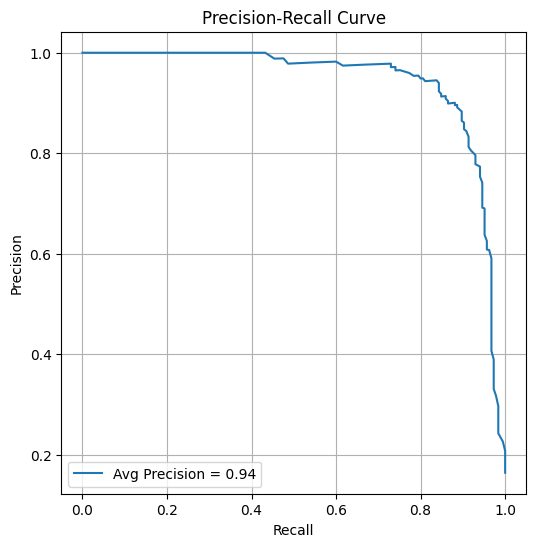

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true = y_test
y_proba = model_best.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_true, y_proba)

avg_precision = average_precision_score(y_true, y_proba)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
churn_list = pd.DataFrame({
    "actual": y_test,
    "predict": y_pred,
    "churn_proba" : y_proba,
})

high_risk_customers = churn_list.join(df_copy["customerid"])
high_risk_customers = high_risk_customers[churn_list["churn_proba"] > 0.8]
high_risk_customers = high_risk_customers.sort_values(by = "customerid").reset_index(drop = True)
high_risk_customers = high_risk_customers.drop(["actual", "predict"], axis = 1)
high_risk_customers = high_risk_customers[['customerid', 'churn_proba']]
high_risk_customers.to_csv("high_risk_customers.csv", index=False)